# Importar librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_students=pd.read_csv('datasets/clean_students_complete.csv',index_col=0).set_index('Student ID')
data_students.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


# Actividad Básica: Puntaje Reading

Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el mejor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.

In [3]:
def plot_reading_score(df,puntaje='mejor',categoria='gender'):
    # diccionario de mejor y peor puntaje
    puntajes_extremos={'mejor':df.reading_score.max(),'peor':df.reading_score.min()}
    
    # seleccionar puntaje
    puntaje_seleccionado=puntajes_extremos[puntaje] if str(puntaje).isalpha() else puntaje
    
    # plotear puntajes
    # obtener dataframe según el query
    df_secc=df.loc[df.reading_score==puntaje_seleccionado,categoria]

    # mostrar resultados en un pie
    df_secc.value_counts().plot.pie(figsize=(10,10),autopct='%.2f %%')
    
    # mostrar cantidad
    number_students=[f'Estudiantes: {i}' for i in df_secc.value_counts().tolist()]
    plt.legend(number_students,loc='best')
    plt.show()

Mostrar plot

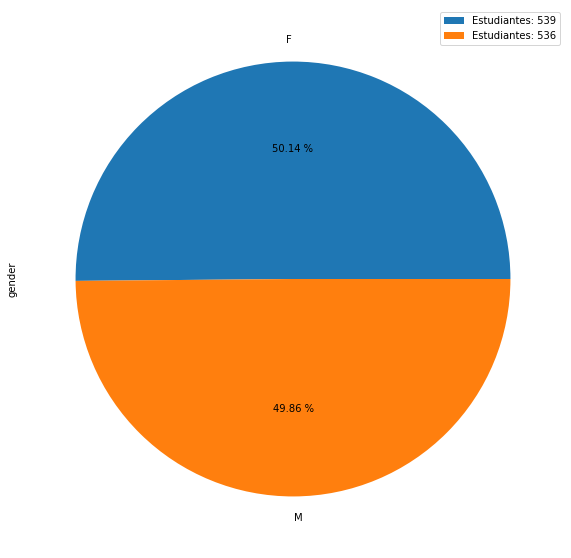

In [4]:
plot_reading_score(data_students,puntaje='mejor',categoria='gender')

Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el peor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.

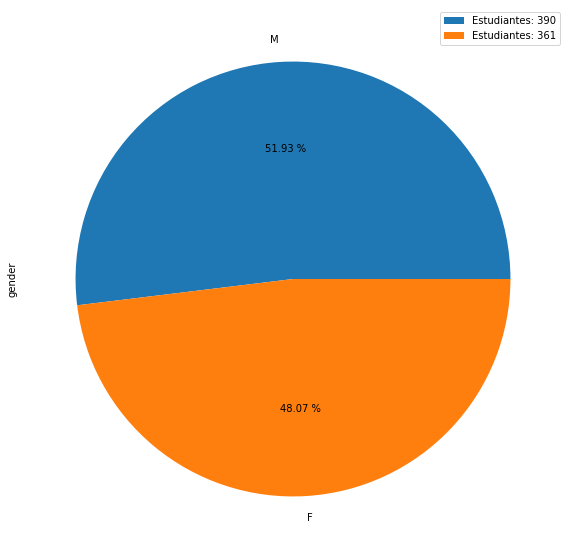

In [5]:
plot_reading_score(data_students,puntaje='peor',categoria='gender')

# Actividad Avanzada: Puntaje Reading

Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el mejor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.

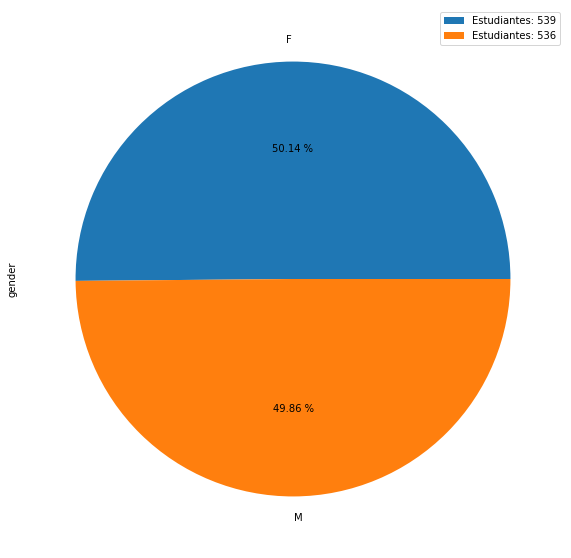

In [6]:
plot_reading_score(data_students,puntaje='mejor',categoria='gender')

Crea / Presenta la forma que creas más conveniente para describir cuántos alumnos por escuela tuvieron el peor puntaje en "reading", y con ello saber que genero es el que predomina en este filtro.

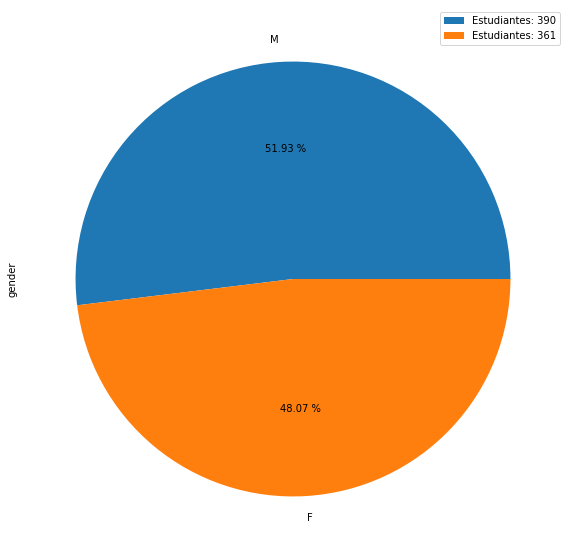

In [7]:
plot_reading_score(data_students,puntaje='peor',categoria='gender')

Para el total de alumnos, evalúa la relación que tiene su puntaje en matemáticas vs reading  y obtén el coeficiente de correlación de Pearson para concluir si los datos se relacionan o no y grafica el resultado.


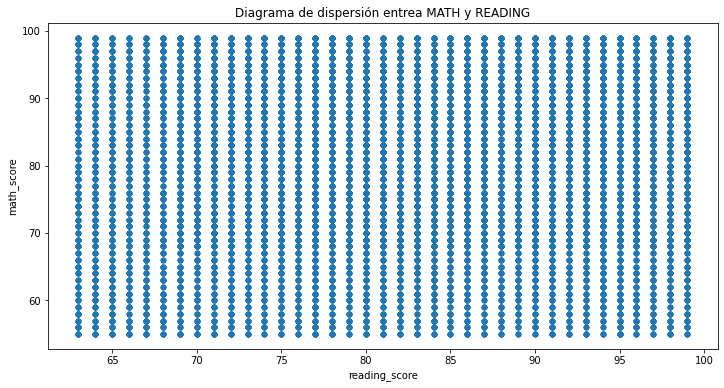

In [8]:
# evaluar matemáticas vs reading
data_students.plot(kind='scatter',x='reading_score',y='math_score',figsize=(12,6))
plt.title('Diagrama de dispersión entrea MATH y READING')
plt.show()

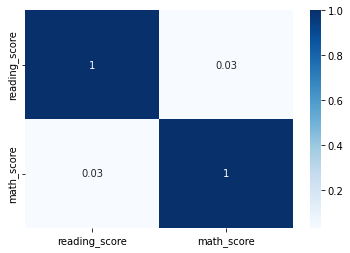

In [9]:
# mostrar relacion de correlaciones
import seaborn as sns

math_reading_corr=data_students[['reading_score','math_score']].corr().apply(lambda x:np.round(x,2))
# plotear heatmap
sns.heatmap(math_reading_corr,annot=True,cmap='Blues')
plt.show()

Se observa que no existe relación lineal en las variables reading_score y math_score para el dataframe total, tanto por el digrama de dispersión como por el valor de la correlación de Pearson (0.03)